# Superstore Sales Analysis Report

![Superstore_Wallpaper](store_wallpaper.jpg)


## Introduction

Businesses have always used data to make informed business decisions. With significant advancements in collecting, storing, analyzing, and reporting data in the last couple of decades, extracting actionable insights from large and complex datasets has never been easier. It has now become an indispensable tool for organizations seeking to gain a competitive edge. More than ever, organizations have now been able to drive informed decisions, optimize processes, and improve overall performance by leveraging analytics technology. Such organizations include large retail companies.

This report presents an **Exploratory Data Analysis (EDA)** of **Superstore sales data**, a fictitious retail company that closely resembles the operational characteristics of real-world retailers. The analysis aims to uncover valuable patterns, trends, and insights that can help the company better understand its sales dynamics, customer behavior, and profitability.

## Business Question

This analysis aims to address the following key business questions:

- **Sales Performance**: What are the overall sales trends, and how have they evolved over time? Are there any significant fluctuations that need to be addressed?

- **Product Categories**: Which product categories contributed the most to the company's sales? Which categories are underperforming, if any?

- **Geographic Insights**: How does sales performance vary across the regions? Are there promising geographical regions or areas requiring improved marketing?

- **Profitability**: Which products are more profitable and which were not? With the available data, what factors affected the company's profit? How is the company's profitability during the period?

This analysis also aims to discover other valuable insights about the dataset. Ultimately, this analysis intends to provide **actionable insights** to guide decision-making and enhance overall business performance.

## Dataset Dictionary

Below is the description of each column in the Superstore dataset:

- **row_id**: Unique row identifier  
- **order_id**: Unique order identifier  
- **order_date**: Date the order was placed  
- **ship_date**: Date the order was shipped  
- **ship_mode**: Shipping method used  
- **customer_id**: Unique customer identifier  
- **customer_name**: Name of the customer  
- **segment**: Segment to which the product belongs (e.g., Consumer, Corporate, Home Office)  
- **country**: Country of the customer  
- **city**: City of the customer  
- **state**: State of the customer  
- **postal_code**: Postal code of the customer  
- **region**: Superstore region represented  
- **product_id**: Unique product identifier  
- **category**: Main category of the product (e.g., Furniture, Office Supplies, Technology)  
- **sub_category**: Sub-category of the product  
- **product_name**: Name of the product  
- **sales**: Total sales amount for that product in the order  
- **quantity**: Total units sold of that product in the order  
- **discount**: Discount percentage applied to the product in the order  
- **profit**: Total profit from that product in the order (net profit after all expenses including discount)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width',None)

In [6]:
df = pd.read_csv('Superstore.csv', encoding='latin1')

In [7]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

### Data Preprocessing

In [10]:
df.drop(columns='Row ID',inplace=True)

### Feature Engineering

In [12]:
## Feature engineering extracts specific data values from the existing features by creating new features.

# Type Conversion
df['Order Date'] = pd.to_datetime(df['Order Date'], format= "%d-%m-%Y")
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format= "%d-%m-%Y")

# Month, Year extraction
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order Year-Month'] = df['Order Date'].dt.to_period('M')

# Extract discount price
df['Total_discount_price'] = df['Sales'] * df['Discount']

# Extract Selling price per unit sold
df['Selling Price (Each Product)'] = df['Sales'] / df['Quantity']

# Extract Net Profit before discount
df['Net-Profit Before Discount'] = (df['Sales'] * df['Discount']) + df['Profit']

# Extract Sales Price After Discount
df['Sales Price After Discount'] = df['Sales'] - (df['Sales'] * df['Discount'])

# Extract Net profit generated per unit sold
df['Net Profit per Unit Sold'] = df['Profit'] / df['Quantity']

# Calculate Profit Margin Percentage
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

# Extract Interval between order placed and order shipped
df['Order Fulfillment Time'] = df['Ship Date'] - df['Order Date']

In [13]:
# Sales = 500
# Discount = 0.1 #10 %
# profit = 50

# Discount_price = Sales * Discount
# net_profit_befor_discount = Discount_price + profit

# print(net_profit_befor_discount)

In [14]:
# Sales =  400
# net_profit = 80

# profit_margin = (net_profit / Sales) * 100
# profit_margin

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   Order ID                      9994 non-null   object         
 1   Order Date                    9994 non-null   datetime64[ns] 
 2   Ship Date                     9994 non-null   datetime64[ns] 
 3   Ship Mode                     9994 non-null   object         
 4   Customer ID                   9994 non-null   object         
 5   Customer Name                 9994 non-null   object         
 6   Segment                       9994 non-null   object         
 7   Country                       9994 non-null   object         
 8   City                          9994 non-null   object         
 9   State                         9994 non-null   object         
 10  Postal Code                   9994 non-null   int64          
 11  Region           

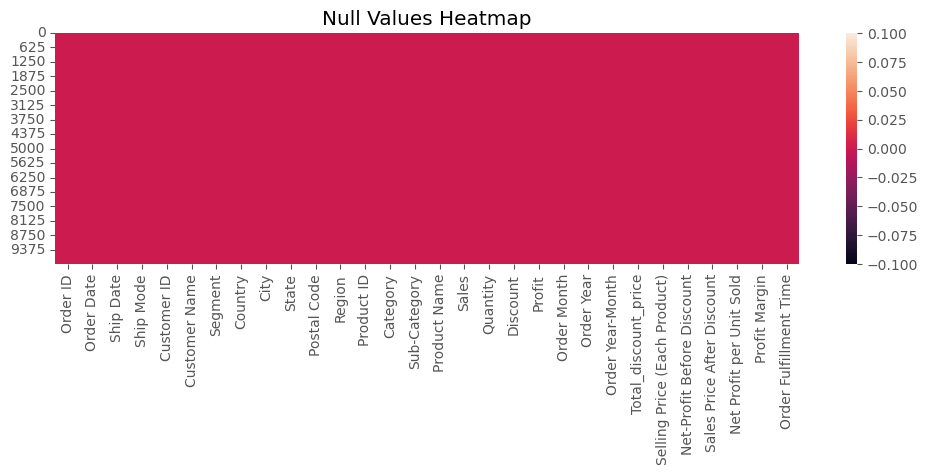

In [16]:
# Check Null values

plt.figure(figsize= (12,3))

plt.title('Null Values Heatmap')
sns.heatmap(df.isnull())
plt.show()

##### The above heatmap confirms no missing values in the dataset

# Exploratory Data Analysis

In [19]:
# Descriptive Statistics
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Order Date,9994,2013-04-30 19:20:02.401441024,2011-01-04 00:00:00,2012-05-23 00:00:00,2013-06-27 00:00:00,2014-05-15 00:00:00,2014-12-31 00:00:00,NaN
Ship Date,9994,2013-05-04 18:20:49.229537792,2011-01-08 00:00:00,2012-05-27 00:00:00,2013-06-30 00:00:00,2014-05-19 00:00:00,2015-01-06 00:00:00,NaN
Postal Code,9994.0,55190.379428,1040.0,23223.0,56430.5,90008.0,99301.0,32063.69335
Sales,9994.0,229.858001,0.444,17.28,54.49,209.94,22638.48,623.245101
Quantity,9994.0,3.789574,1.0,2.0,3.0,5.0,14.0,2.22511
Discount,9994.0,0.156203,0.0,0.0,0.2,0.2,0.8,0.206452
Profit,9994.0,28.656896,-6599.978,1.72875,8.6665,29.364,8399.976,234.260108
Order Month,9994.0,7.814589,1.0,5.0,9.0,11.0,12.0,3.286047
Order Year,9994.0,2012.722934,2011.0,2012.0,2013.0,2014.0,2014.0,1.124039
Total_discount_price,9994.0,32.27758,0.0,0.0,1.0368,14.8704,11319.24,164.025577


## Sales Performance
What are the overall sales trends, and how have they evolved over time? Are there any significant fluctuations that need to be addressed?

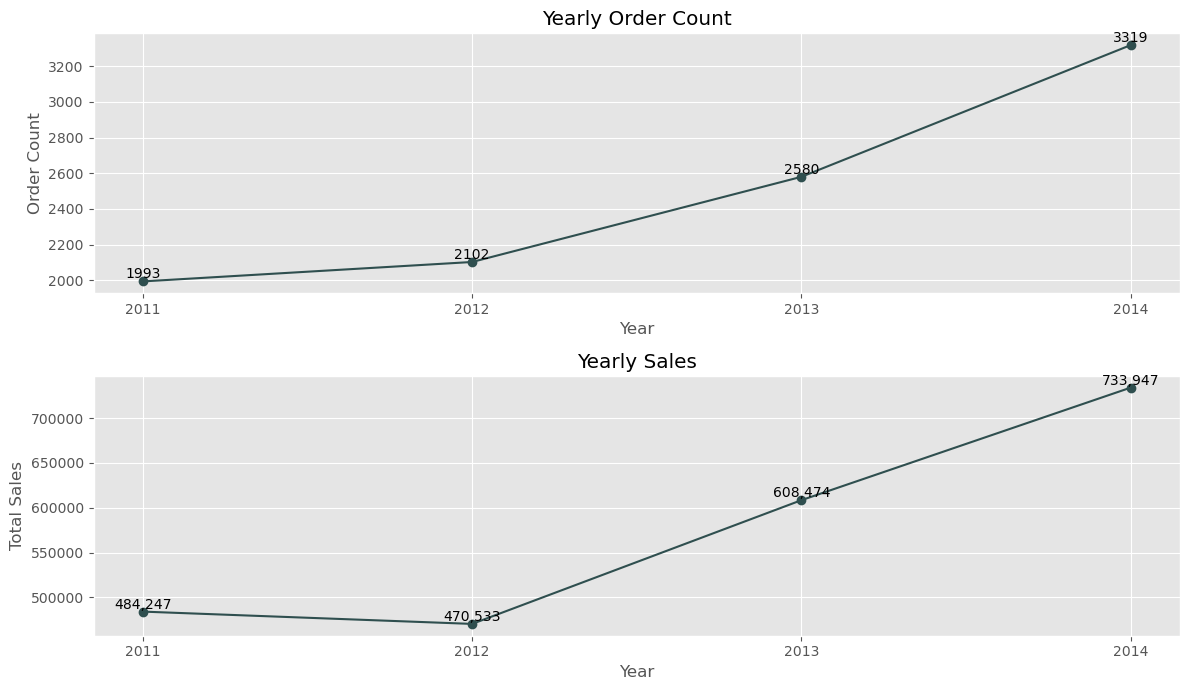

In [21]:
# Year - Order Count
# Year - Total Sales

plt.figure(figsize=(12,7))

plt.subplot(211)
yearly_order = df.groupby('Order Year')['Order Date'].count()

yearly_order.plot(c='darkslategray', marker= 'o')
plt.ylabel('Order Count')
plt.xlabel('Year')
plt.xticks(yearly_order.index)
plt.title('Yearly Order Count')

for year, count in yearly_order.items():
    plt.text(year, count, str(count), ha='center', va='bottom', fontsize=10)
    
plt.subplot(212)

yearly_sales = df.groupby('Order Year')['Sales'].sum()

yearly_sales.plot(c='darkslategray', marker= 'o')
plt.ylabel('Total Sales')
plt.xlabel('Year')
plt.xticks(yearly_sales.index)
plt.title('Yearly Sales')

for year, sales in yearly_sales.items():
    plt.text(year, sales, f'{sales:,.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

---

### 📊 **Yearly Order & Sales Insights (2011–2014)**

  -  **Consistent Growth**: Both order count and sales increased steadily from 2012 to 2014, indicating strong business momentum.

  -  **2012 Dip in Sales**: Despite more orders, sales slightly dropped in 2012 — likely due to lower average order value or heavy discounts.

  -  **Peak in 2014**: 2014 saw the highest orders (3319) and sales (\~734K), reflecting peak business performance.

---

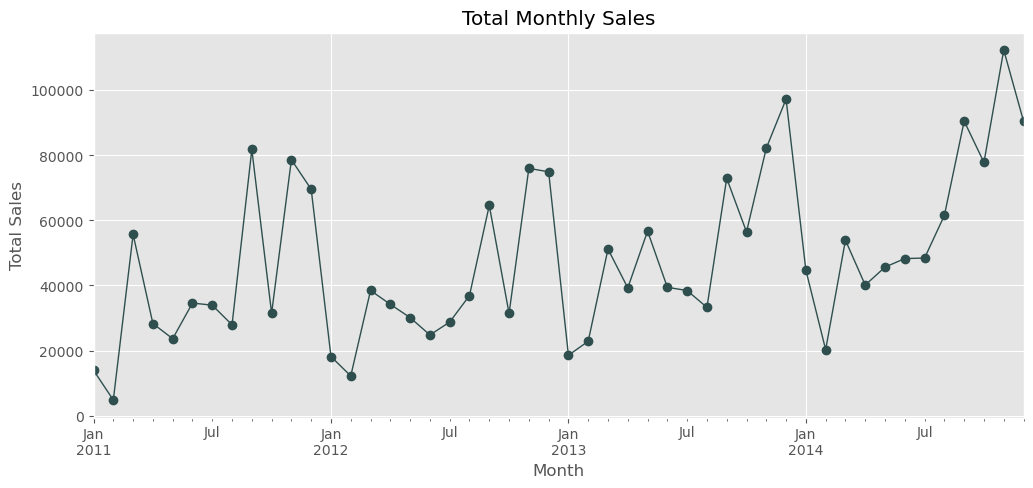

In [23]:
# Monthly Sales

year_month_sales = df.groupby('Order Year-Month')['Sales'].sum()

plt.figure(figsize=(12,5))
year_month_sales.plot(c= 'darkslategray', marker= 'o', lw=1)

plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Monthly Sales')

plt.show()

---

### **Insights from Monthly Sales – American Superstore (2011–2014)**

#### 1. **Holiday Season Drives Peak Sales (Q4)**

* **November and December** consistently show the **highest sales** every year.

  * Likely due to **Black Friday**, **Cyber Monday**, and **Christmas** shopping rush.
  * 📌 *Example: Nov 2014 – \$112K+, Dec 2014 – \$90K+*
* Action: **Allocate higher inventory, staff, and marketing budget for Q4.**

---

#### 2. **Back-to-School & Fiscal Year-End Boosts (August–September)**

* **August–September** often show a **sales spike**.

  * Could relate to **back-to-school sales** and **Q3 fiscal closing** purchases.
  * 📌 *Sep 2014 – \$90K+, Sep 2013 – \$72K+*
* Action: Promote **school supplies, furniture, electronics** in late summer.

---

#### 3. **Slow Starts Post-Holidays (January–February)**

* **Sales dip** in January and February each year.

  * Reflects **customer spending fatigue** after holiday splurges.
  * 📌 *Feb 2012 – \~\$12K, Feb 2011 – \~\$4.8K*
* Action: Run **New Year clearance** or **loyalty-based promotions** to re-engage customers.

---

#### 4. **Spring Campaign Opportunities (March–May)**

* Sales rise again in **March**, showing seasonal recovery.

  * 📌 *March 2013 – \$51K, March 2014 – \$53K*
* Action: Use **spring refresh campaigns**, targeting home and office categories.

---

#### 5. **Consistent Year-on-Year Growth**

* From 2011 to 2014, there’s a **clear upward trend** in monthly sales.

  * Indicates **effective operations, marketing, or market expansion**.
* Action: Keep scaling high-performing months and analyze underperforming ones.

---

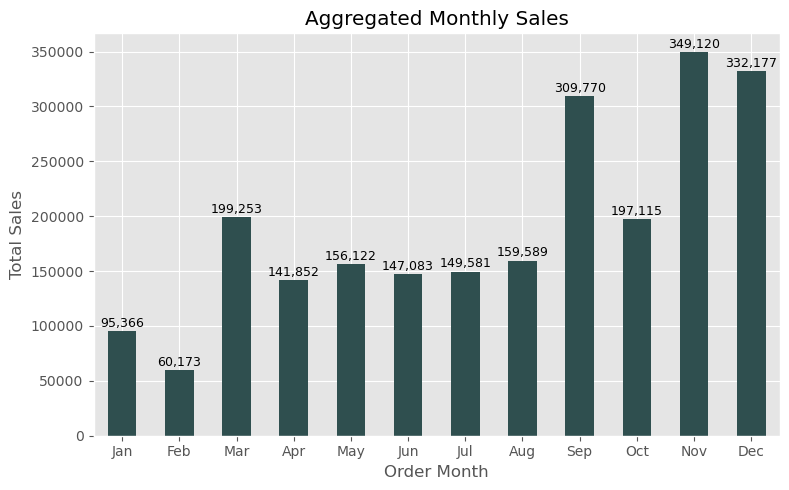

In [25]:
# Aggregated Monthly Sales

monthly_sales = df.groupby('Order Month')['Sales'].sum()

#plt.figure(figsize= (8,5))

monthly_sales.plot(kind= 'bar', color= 'darkslategray',figsize= (8,5), width = .5)

plt.xticks(ticks= np.arange(0, 12 , 1),
           labels= ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation= 0)
plt.ylabel('Total Sales')
plt.title('Aggregated Monthly Sales')

for i, value in enumerate(monthly_sales):
    plt.text(i, value + 1000, f'{value:,.0f}', ha='center', va='bottom', fontsize=9)
    
plt.tight_layout()
plt.show()

---

### 📊 **Key Monthly Sales Insights**

* **Top Months:**

  * **November (\$349K)** and **December (\$332K)** lead sales — driven by holiday shopping.
  * **September (\$309K)** also shows strong performance.

* **Low Sales Months:**

  * **January (\$95K)** and **February (\$60K)** are the weakest — post-holiday dip.

* **Other Strong Periods:**

  * **March** and **May** see high activity — likely due to spring sales and tax refunds.

---


### Sub-Category wise monthly Sales

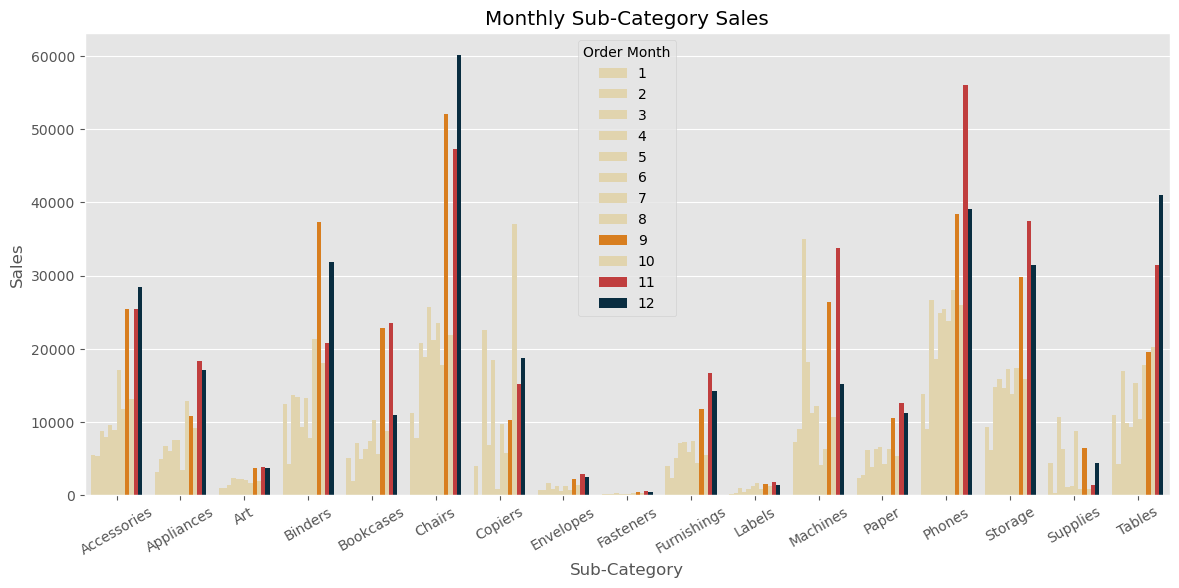

In [28]:
month_subcat_sales =  df.groupby(['Order Month', 'Sub-Category'])['Sales'].sum().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(data= month_subcat_sales,
           x= 'Sub-Category',
           y= 'Sales',
           hue= 'Order Month',
           palette= ['#e9d8a6', '#e9d8a6', '#e9d8a6',
                    '#e9d8a6', '#e9d8a6', '#e9d8a6',
                    '#e9d8a6', '#e9d8a6', '#f77f00',
                    '#e9d8a6', '#d62828', '#003049']
       )
plt.xticks(rotation = 30)
plt.title('Monthly Sub-Category Sales')
plt.show()

---

### 📌 **Key Business Insights:**

1. **Phones, Chairs, and Tables** are the **top-selling sub-categories**, especially during **Nov (11)** and **Dec (12)** — likely due to **year-end sales** or **corporate budget spending**.

   * 👉 Plan **bulk promotions or bundle offers** during Q4.

2. **Binders, Storage, and Accessories** also show **consistent performance** throughout the year, peaking in **Sep–Dec**.

   * 👉 These are reliable revenue drivers — maintain steady inventory.

3. **Appliances and Machines** show **strong spikes mid-year** (likely **May–Aug**) and again in **Q4**.

   * 👉 Use targeted campaigns before these periods for upselling.

4. **Low-performing sub-categories**: Envelopes, Fasteners, Labels, Art.

   * 👉 Reassess product placement or consider **removal** if margins are low.

5. **High Q4 demand** (Months 9–12) is visible **across most sub-categories**.

   * 👉 **Stock up & advertise early** for seasonal demand.

---


### Segment wise monthly Sales

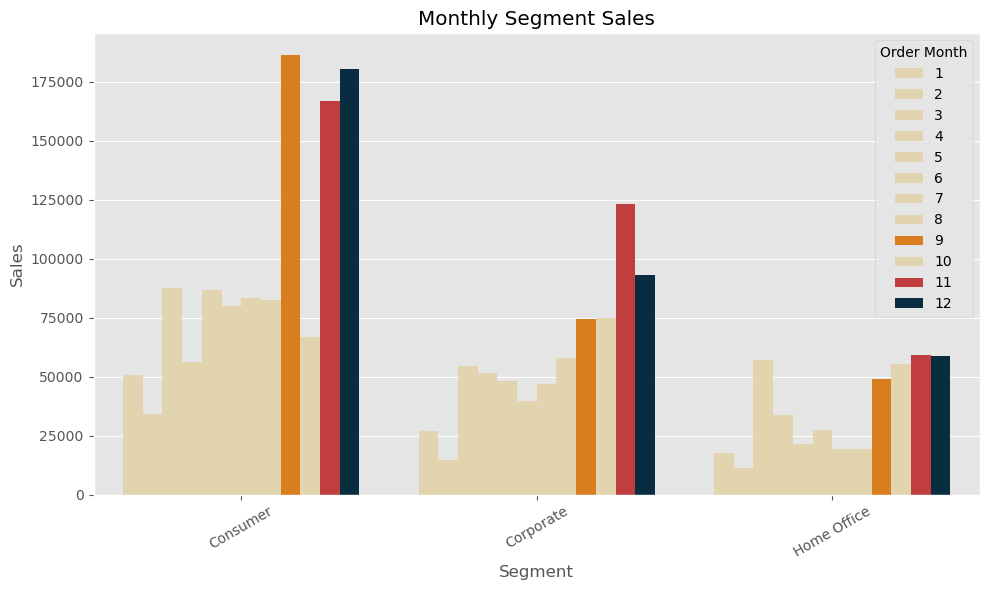

In [31]:
month_segment_sales = df.groupby(['Order Month', 'Segment'])['Sales'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    data=month_segment_sales,
    x='Segment',
    y='Sales',
    hue='Order Month',
    palette=[
        '#e9d8a6', '#e9d8a6', '#e9d8a6',
        '#e9d8a6', '#e9d8a6', '#e9d8a6',
        '#e9d8a6', '#e9d8a6', '#f77f00',
        '#e9d8a6', '#d62828', '#003049'
    ]
)

plt.xticks(rotation=30)
plt.title('Monthly Segment Sales')
plt.tight_layout()
plt.show()


---

### 🔍 **Key Insights – Monthly Segment Sales**

1. **Consumer Segment** is the top performer every month, especially in **Sep, Nov, and Dec**.
2. **Sales peak in Q4** (Months 9, 11, 12) across all segments — likely due to holidays.
3. **Corporate Segment** shows good performance but has room for growth.
4. **Home Office Segment** has the **lowest sales** and needs improvement.

---

### Year-Month wise Average Sales  

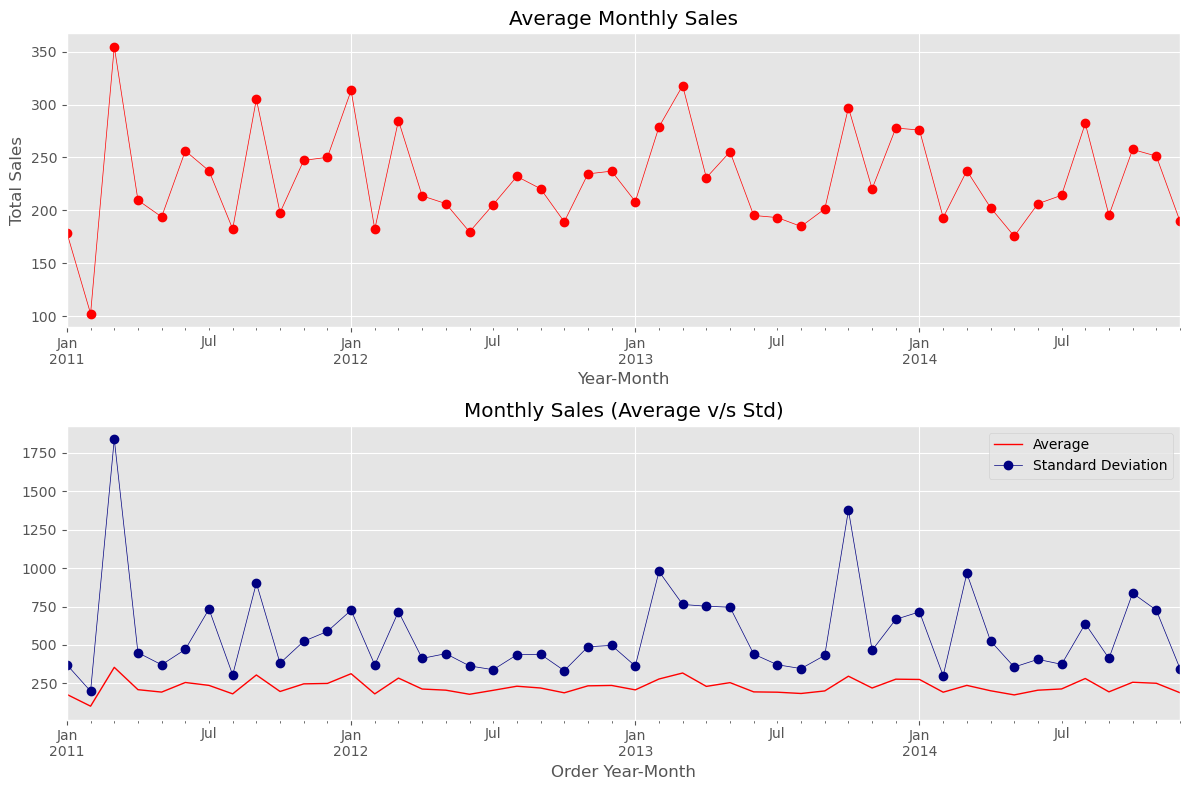

In [34]:
plt.figure(figsize=(12,8))

plt.subplot(211)
df.groupby('Order Year-Month')['Sales'].mean().plot(c='red',lw= 0.5, marker= 'o')
plt.ylabel('Total Sales')
plt.xlabel('Year-Month')
plt.title('Average Monthly Sales')


plt.subplot(212)
df.groupby('Order Year-Month')['Sales'].mean().plot(c='red', lw= 1)
df.groupby('Order Year-Month')['Sales'].describe()['std'].plot(c='navy', lw= 0.5, marker= 'o')

plt.title('Monthly Sales (Average v/s Std)')
plt.legend(['Average', 'Standard Deviation'])

plt.tight_layout()
plt.show()

---

### 📊 **Sales Trend Insights (2011–2014)**

1. **Average Monthly Sales** remain fairly stable over time, mostly between **200–300 units**, showing consistent performance.
2. **Early 2011** saw a **sales spike and sharp fluctuations**, indicating possible launch/promotional effects.
3. **Standard Deviation is high** compared to the average in several months (e.g., Jan 2011, mid-2013, late 2014), suggesting **sales volatility**.
4. **Post-2012**, both average sales and volatility show improved stability — indicating a **maturing business model**.

---

### 💡 **Business Actions**

* **Investigate high-variance months** (e.g., Jan 2011, October 2013) to identify what caused large fluctuations — promotions, events, stockouts?
* **Leverage stable periods** for long-term forecasting and resource planning.
* Reduce unpredictability by **targeting consistent campaigns** in volatile months.

---

# Product Categories
Which product categories contributed the most to the company's sales? Which categories are underperforming, if any?

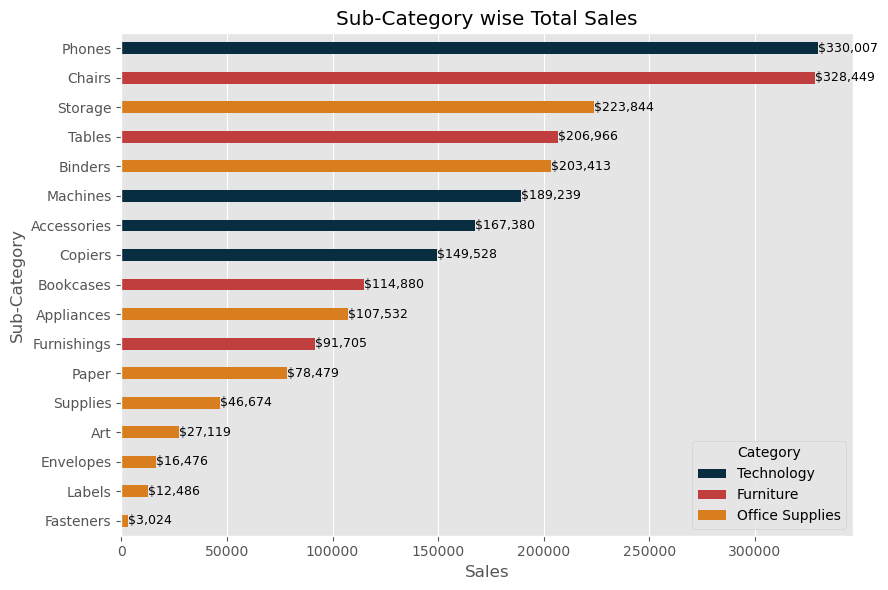

In [37]:
subcat_sales = df.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index().sort_values('Sales',ascending=False)

plt.figure(figsize=(9,6))
barplot = sns.barplot(data= subcat_sales,
           x= 'Sales',
           y= 'Sub-Category',
           hue= 'Category',
           palette= ['#003049', '#d62828', '#f77f00'],
           width = 0.4)

for container in barplot.containers:
    for bar in container:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        barplot.text(
            width + 10, y,  # position to the right of bar
            f"${width:,.0f}",  # formatted label with $ and commas
            va='center', ha='left', fontsize=9, color='black'
        )
        
plt.title('Sub-Category wise Total Sales')
plt.tight_layout()

plt.show()

---

### 🔍 **Key Business Insights of Sub-Category wise Sales**

* **Top Sellers**: Phones and Chairs drive the highest sales — focus on these for growth.
* **Strong Mid-Performers**: Storage, Tables, Binders, and Machines show solid performance — Boost with better pricing, visibility, or discounts and promote them further.
* **Low Performers**: Fasteners, Labels, and Envelopes have very low sales — consider reviewing or phasing out.
* **Category Trends**:

  * **Technology** leads in average sales.
  * **Furniture** is mixed — Chairs sell well, Furnishings don’t.
  * **Office Supplies** has many low-selling items — needs optimization.
  * "Needs optimization" means **analyzing and improving the category** — removing what's not working, enhancing what's promising, and    making it more efficient and profitable.

---

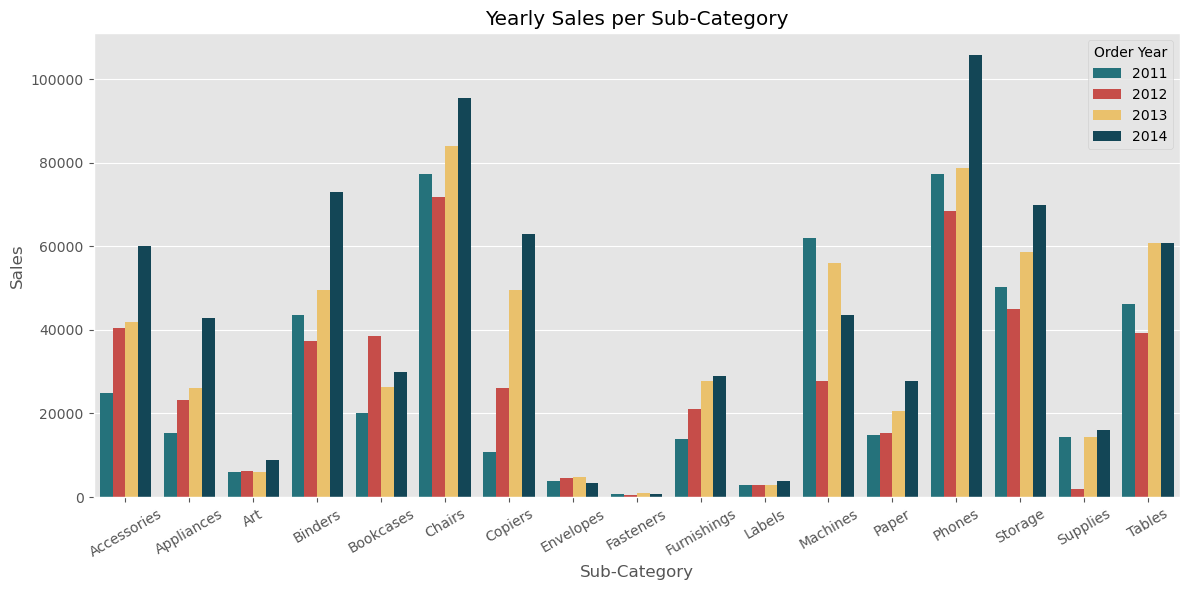

In [39]:
year_subcat_sales = df.groupby(['Sub-Category','Order Year'])['Sales'].sum().reset_index()

plt.figure(figsize=(12,6))

sns.barplot(data= year_subcat_sales,
           x= 'Sub-Category',
           y= 'Sales',
           hue= 'Order Year',
           palette= ['#177e89', '#db3a34', '#ffc857', '#084c61'])

plt.xticks(rotation= 30)
plt.title('Yearly Sales per Sub-Category')

plt.tight_layout()
plt.show()

---

### 📈 **Top Performing Sub-Categories**

1. **Phones, Chairs, and Binders** consistently show the **highest sales** across all years (2011–2014).

   * ✅ These are **high-demand categories** — consider **expanding product lines**, running **targeted promotions**, or **bundling** with related items to maximize revenue.

2. **Storage and Accessories** also perform well and exhibit **steady growth**.

   * 👉 May benefit from **cross-selling** with high-ticket items.

---

### 📉 **Low Performing Sub-Categories**

1. **Fasteners, Labels, and Envelopes** have **consistently very low sales** every year.

   * ⚠️ These may need **cost optimization**, **repositioning**, or could be **phased out** if not strategically important.

2. **Art and Supplies** also reflect low sales with **minimal year-over-year improvement**.

   * 🧠 Consider conducting **market research** to understand low engagement.

---

### 📊 **Growth Patterns**

* Most sub-categories show **positive sales growth** over the years, indicating an **overall healthy trend**.

  * E.g., **Phones and Chairs** have seen significant increase from 2011 to 2014.

* Some categories like **Machines and Binders** show **fluctuations** — high one year, then drop.

  * 🔍 These need **closer investigation**: are there **inventory issues**, **seasonal demand**, or **market shifts**?

---

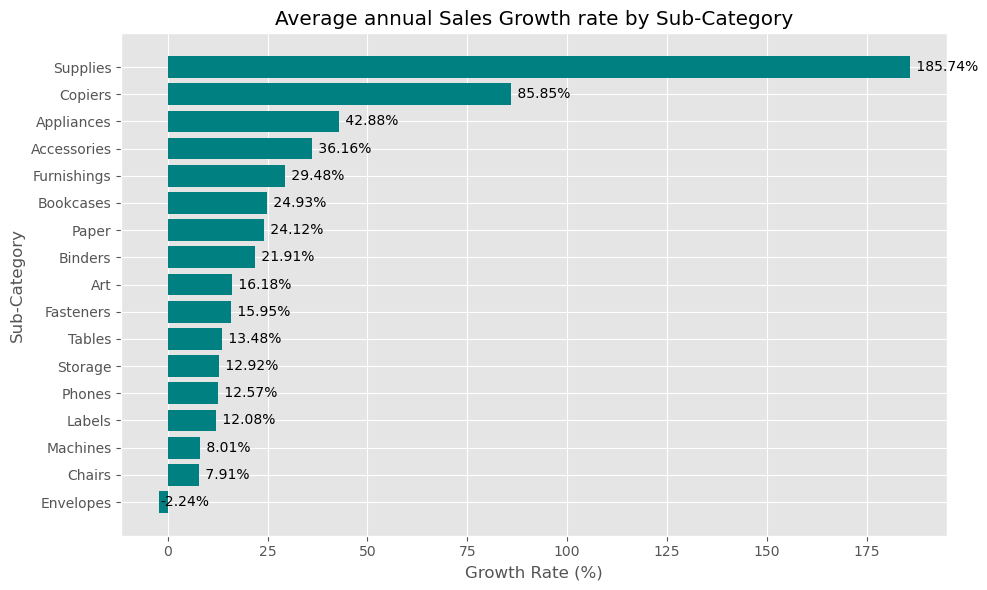

In [41]:
year_subcat_sales['yearly_growth_rate'] = year_subcat_sales.groupby('Sub-Category')['Sales'].pct_change()*100

avg_growth = year_subcat_sales.groupby('Sub-Category')['yearly_growth_rate'].mean().sort_values()

plt.figure(figsize= (10,6))

bars = plt.barh(avg_growth.index,
               avg_growth.values,
               color= 'teal')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{width: .2f}%', va='center')

plt.title('Average annual Sales Growth rate by Sub-Category')
plt.xlabel('Growth Rate (%)')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.show()

---

### 🔝 High Growth:

* **Supplies (185.74%)** and **Copiers (85.85%)** show the highest growth.

### 📈 Moderate Growth:

* **Appliances, Accessories, Furnishings** show solid performance.

### ⚖️ Average:

* **Bookcases, Paper, Binders** show stable but slower growth.

### ⚠️ Low Growth:

* **Envelopes, Chairs, Machines** lag behind.

---



### ✅ **Final Conclusion: Sales Performance by Product Categories**

---

**🔝 Top-Contributing Categories:**

* **Technology**:
  *Phones* consistently lead in sales and show strong year-over-year growth.
  **Copiers** and **Accessories** also show high growth, highlighting **Technology** as the **top-performing category**.

* **Furniture**:
  *Chairs* are among the highest sellers with good growth trends, indicating they are a **key revenue driver** within this category.

* **Office Supplies**:
  *Binders* perform moderately in both sales and growth, making them a **reliable mid-performer**.

---

**⚠️ Underperforming Categories:**

* **Office Supplies**:
  Sub-categories like *Fasteners, Labels, Envelopes*, and *Art Supplies* show consistently low sales and weak or negative growth.
  These require **optimization** or **potential phase-out**.

* **Furniture**:
  *Furnishings* underperform compared to other furniture items — needs **product or pricing reevaluation**.

* **Machines (Technology)**:
  Low growth and average sales — may need **marketing or product improvement**.

---

**📌 Final Insight:**
The company’s sales are mainly driven by **Technology (Phones, Copiers)** and **select Furniture items (Chairs)**.
However, several **Office Supplies and lower-tier Furniture items** are dragging performance, signaling the need for **category review, cost control, and product strategy optimization**.


# Geographical Insights
How does sales performance vary across the regions? Are there promising geographical regions or areas requiring improved marketing?

In [45]:
df.rename(columns= {'Order Year': 'Order_Year'}, inplace= True)

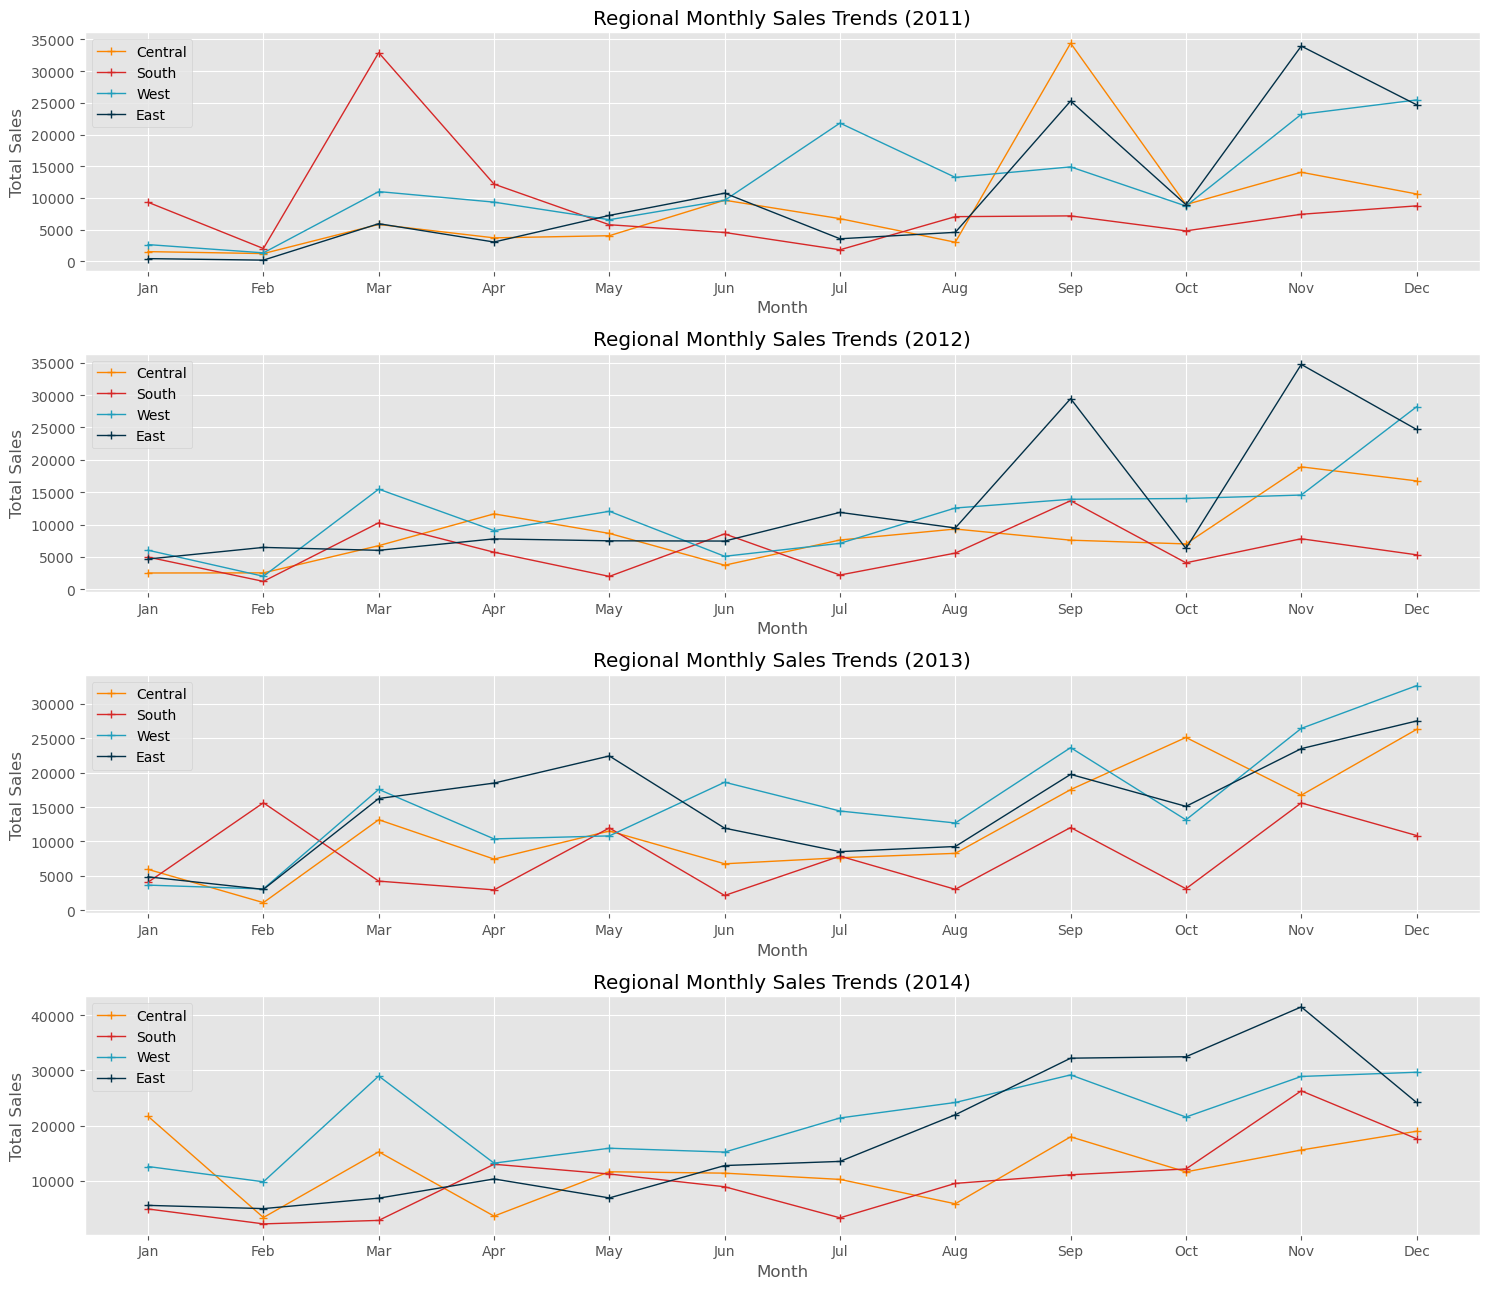

In [46]:
# Regional Sales Trends

years = [2011, 2012, 2013, 2014]
regions = ['Central', 'South', 'West', 'East']
colors = {'Central': '#fb8500', 'South':'#d62828', 'West':'#219ebc', 'East':'#023047'}

plt.figure(figsize=(15,13))

for i, year in enumerate(years, start=1):
    plt.subplot(4,1,i)
    yearly_df = df.query(f'Order_Year == {year}')

    for region in regions:
        monthly_sales  = yearly_df.query(f"Region == '{region}'").groupby('Order Month')['Sales'].sum()
        plt.plot(monthly_sales, label= region, c= colors[region], lw= 1, marker = '+' )
    plt.title(f"Regional Monthly Sales Trends ({year})")
    plt.xlabel("Month")
    plt.ylabel("Total Sales")
    plt.xticks(ticks = np.arange(1,13,1), labels= ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend()

plt.tight_layout()
plt.show()

---

### 📍 **Regional Performance Overview**

1. **West Region**:

   * Shows **strongest and most consistent growth** across all four years.
   * Frequently has **highest monthly sales**, especially notable in **Q4** (Oct–Dec).
   * Recommendation: **Invest more in the West** — scale marketing, improve supply chain efficiency, and explore regional product preferences.

2. **East Region**:

   * Strong and steady performer, especially from **2012 onward**.
   * Often **second-highest** in total monthly sales after the West.
   * Recommendation: **Targeted campaigns** and **cross-sell opportunities** can help push this region even higher.

3. **Central Region**:

   * Sales are **inconsistent and volatile**, with **spikes in Sep 2011 and Oct 2012**, but no sustained growth.
   * Recommendation: Conduct a **deep analysis** — look into demand patterns, seasonal factors, or promotion impact.

4. **South Region**:

   * Consistently the **lowest performer** across all years.
   * Little to no visible growth trend.
   * Recommendation: **Reassess strategy** in this region — review product fit, distribution issues, or customer engagement.

---

### 📆 **Seasonal Trends (All Regions)**

* **November** tends to have **peak sales** across most regions — likely due to holiday or year-end campaigns.
* **March and September** also show occasional sales spikes — potential promotional opportunities.
* **Sales generally rise in Q4**, making it a **critical period for maximizing revenue**.

---

### 🔁 **Sales Trend Patterns**

* The **West and East regions** show an upward trend, suggesting **healthy regional expansion**.
* **Central and South** need strategic support — whether via promotions, localized products, or service improvements.

---

### ✅ **Actionable Recommendations**

1. **Double down on West & East**: These regions are already performing well — continue investing in them to scale further.
2. **Fix Central volatility**: Investigate why spikes aren’t sustainable — maybe specific campaigns or products.
3. **Re-evaluate South**: Consider either **revamping the approach** or **redirecting resources** if the market isn't viable.
4. **Leverage Q4**: Plan major campaigns and stock buildup around **October–December**.

---


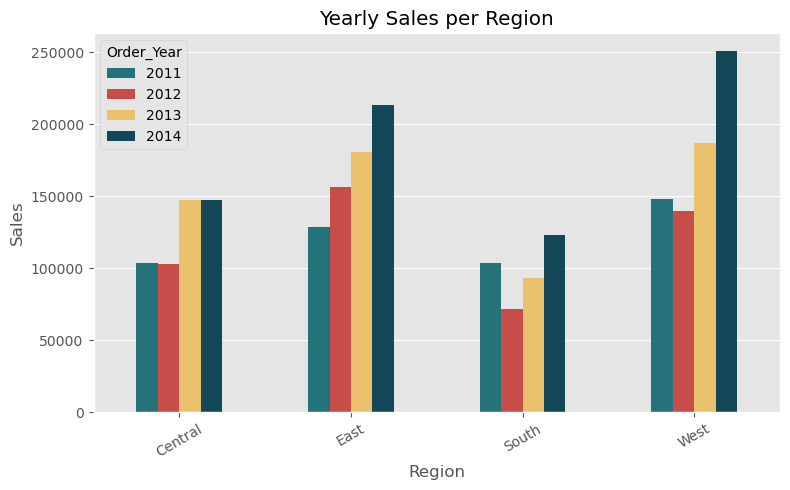

In [48]:
# Yearly Sales per Region

yearly_sales_region = df.groupby(['Region', 'Order_Year'])['Sales'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data= yearly_sales_region,
           x = 'Region',
           y= 'Sales',
           hue= 'Order_Year',
           palette= ['#177e89', '#db3a34', '#ffc857', '#084c61'],
           width= 0.5)

plt.xticks(rotation= 30)
plt.title('Yearly Sales per Region')

plt.tight_layout()
plt.show()

* **West** is the top-performing region with strong year-over-year growth, peaking in 2014.
* **East** shows steady and consistent growth, making it a reliable performer.
* **Central** has moderate sales with slight growth—potential for improvement.
* **South** underperforms across all years, requiring targeted strategies to boost sales.


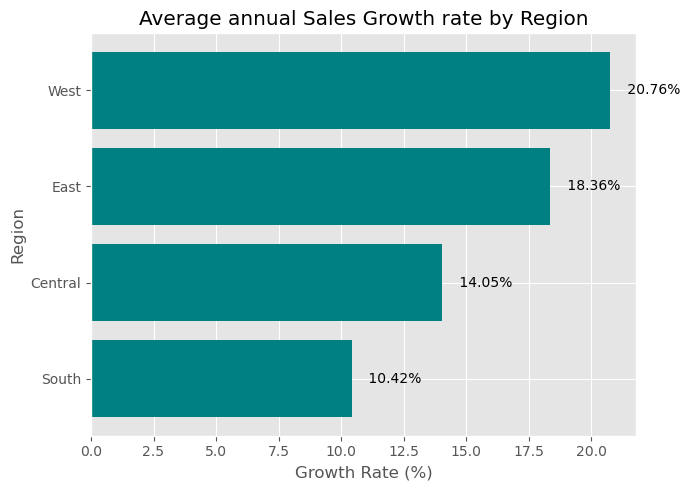

In [50]:
## Region wise Sales annual average growth rate (2011-2014)

yearly_sales_region['yearly_growth_rate'] = yearly_sales_region.groupby('Region')['Sales'].pct_change() * 100
avg_growth_region = yearly_sales_region.groupby('Region')['yearly_growth_rate'].mean().sort_values()

plt.figure(figsize= (7,5))

bars = plt.barh(avg_growth_region.index,
               avg_growth_region.values,
               color= 'teal')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{width: .2f}%', va='center')

plt.title('Average annual Sales Growth rate by Region')
plt.xlabel('Growth Rate (%)')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

* **West** has the **highest average annual growth** (20.76%), indicating strong expansion and high potential.
* **East** follows with **18.36%**, showing consistent and promising growth.
* **Central** is moderate at **14.05%**, suggesting room for strategic improvement.
* **South** has the **lowest growth** (10.42%), signaling a need for intervention to boost performance.

### 📊 **Final Insights: Regional Sales Performance Analysis**

**✅ Top Performing Regions:**

* **West** leads with the **highest average annual growth (20.76%)** and shows **consistent monthly dominance**, especially in **Q4**.
  → **Action**: Prioritize **investment, targeted marketing**, and **regional product optimization** here to capitalize on momentum.

* **East** maintains **steady performance** and is the **second-best region (18.36% growth)**.
  → **Action**: Launch **cross-sell campaigns**, strengthen presence through **localized promotions**, and deepen **customer engagement**.

---

**⚠️ Regions Requiring Attention:**

* **Central** shows **moderate growth (14.05%)** but is **volatile**, with only short-term spikes.
  → **Action**: Conduct a **root cause analysis** of inconsistencies and design **region-specific offers** to build stability.

* **South** is the **lowest performer (10.42%)**, with minimal growth across all years.
  → **Action**: **Reassess go-to-market strategy** — explore whether poor performance is due to **product fit, reach, or customer disconnect**.

---

**📅 Seasonal Opportunity:**

* **Q4 (especially November)** is peak season across all regions — ideal for **high-impact campaigns** and **inventory ramp-up**.
* **March and September** show potential mini-peaks — consider **mid-year promotions**.

---

### 🧭 Conclusion:

Sales performance **varies significantly by region**:

* **West and East** are **promising regions** and should be **further scaled**.
* **Central and South** need **strategic interventions** to stabilize or grow.
* Marketing resources should be **focused on high-performing regions**, while **South requires a fresh approach** or potential reallocation of efforts.


# Profitability
Which products are more profitable and which were not? With the available data, what factors affected the company's profit? How is the company's profitability during the period?

In [54]:
## Net profit over the years

yearly_summary = df.groupby('Order_Year')[['Sales', 'Profit']].sum()

yearly_summary['Profit_Margin'] = (yearly_summary['Profit'] / yearly_summary['Sales']) * 100

yearly_summary

,Sales,Profit,Profit_Margin
Order_Year,,,
2011,484247.4981,49543.9741,10.231126
2012,470532.5090,61618.6037,13.095504
2013,608473.8300,81726.9308,13.431462
2014,733947.0232,93507.5131,12.740363


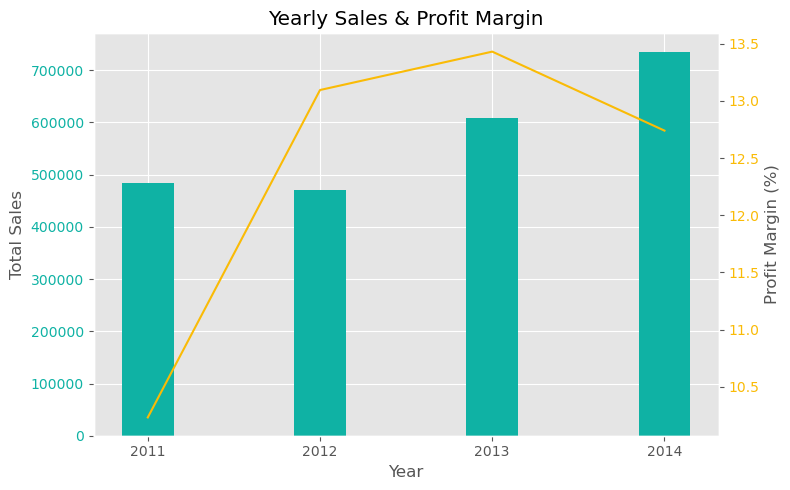

In [55]:
fig, bar1 = plt.subplots(figsize = (8,5))

bar1.bar(yearly_summary.index,
        yearly_summary['Sales'],
        color = '#0fb2a4',
        width = 0.3)
bar1.set_xticks(yearly_summary.index)
bar1.set_xlabel('Year')
bar1.set_ylabel('Total Sales')
bar1.tick_params(axis='y', labelcolor = '#0fb2a4')


line1 = bar1.twinx()
# .twinx() : This create a second axes

line1.plot(yearly_summary.index,
          yearly_summary['Profit_Margin'],
          color = '#fabb06')
line1.set_ylabel('Profit Margin (%)')
line1.tick_params(axis='y', labelcolor = '#fabb06')
line1.grid(False)

plt.title('Yearly Sales & Profit Margin')
fig.tight_layout()


plt.show()

### 📊 **Business Insights from Yearly Sales, Profit, and Profit Margin Analysis**

#### 📈 **Sales Trend**:

* Sales increased **steadily every year** from **2012 to 2014**, peaking in **2014** at **\$733,947**.
* Slight dip in sales from 2011 to 2012, but recovered strongly afterward.

#### 💰 **Profit Trend**:

* Profit grew **consistently each year**, with the **highest profit** of **\$93,507** in **2014**.
* This indicates efficient operations and possibly better product performance or pricing strategy.

#### 📉 **Profit Margin Insights**:

* **Highest profit margin** was in **2013 (13.43%)**, suggesting that year had the most **cost-efficient operations or best-selling high-margin products**.
* **2011 had the lowest profit margin (10.23%)**, indicating higher costs or less efficient sales.

---


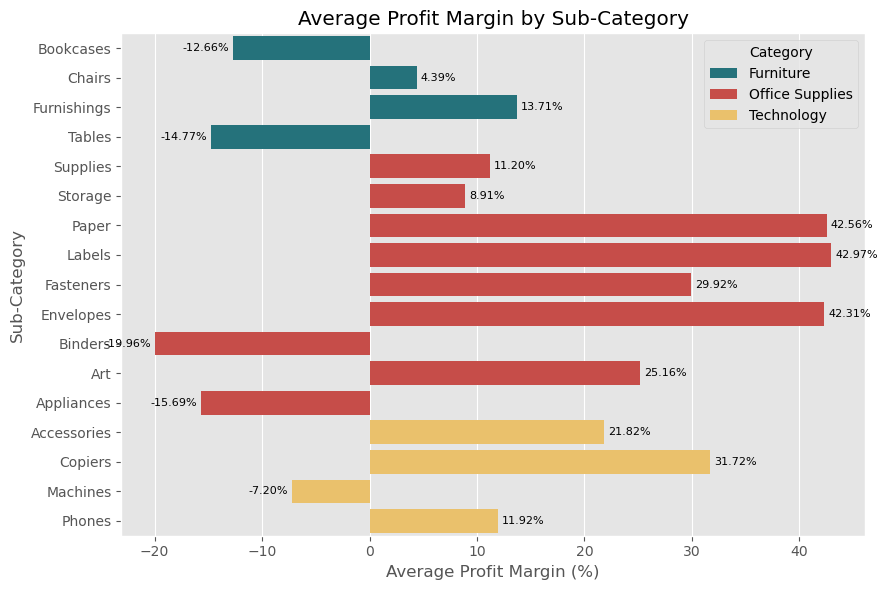

In [57]:
## Category & Sub-Category wise profit

profit_margin_df = df.groupby(['Category', 'Sub-Category'])['Profit Margin'].mean().reset_index()
profit_margin_df = profit_margin_df.sort_values('Category')

plt.figure(figsize= (9,6))
barplot = sns.barplot(
           profit_margin_df,
           x= 'Profit Margin',
           y= 'Sub-Category',
           hue= 'Category',
           palette= ['#177e89', '#db3a34', '#ffc857']
)

for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f%%', label_type='edge', padding=3, fontsize=8)

plt.title('Average Profit Margin by Sub-Category')
plt.xlabel('Average Profit Margin (%)')
plt.ylabel('Sub-Category')
plt.legend(title = 'Category')

plt.tight_layout()
plt.show()

---

### 📊 **Top Performing Sub-Categories (High Profit Margin)**

1. **Labels (42.97%)**, **Paper (42.56%)**, and **Envelopes (42.31%)** have the **highest profit margins**, all from **Office Supplies**.
2. **Copiers (31.72%)** and **Fasteners (29.92%)** also show **exceptional profitability**, with **Copiers** from **Technology** and **Fasteners** from **Office Supplies**.
3. These sub-categories are **prime profit drivers** — businesses should:

   * Prioritize stock availability.
   * Focus marketing campaigns here.
   * Bundle these items to boost sales further.

---

### ⚠️ **Underperforming Sub-Categories (Negative Profit Margin)**

1. **Binders (-19.96%)**, **Appliances (-15.69%)**, and **Tables (-14.77%)** show **significant losses**.
2. **Machines (-7.20%)** and **Bookcases (-12.66%)** are also **dragging down profitability**.
3. These sub-categories need:

   * A cost-revenue analysis.
   * Possible **price adjustments** or **discount control**.
   * Review of inventory, supplier costs, or logistics.

---

### 📁 **Category-Level Summary**

* **Office Supplies** dominates the **top profit margin ranks**, indicating high potential in simple, everyday-use items.
* **Technology** shows **mixed performance** — **Copiers and Accessories** are very profitable, but **Machines** are dragging down the average.
* **Furniture** tends to have **low or negative margins**, especially **Tables, Bookcases, and Chairs**, suggesting high cost or low demand.

---

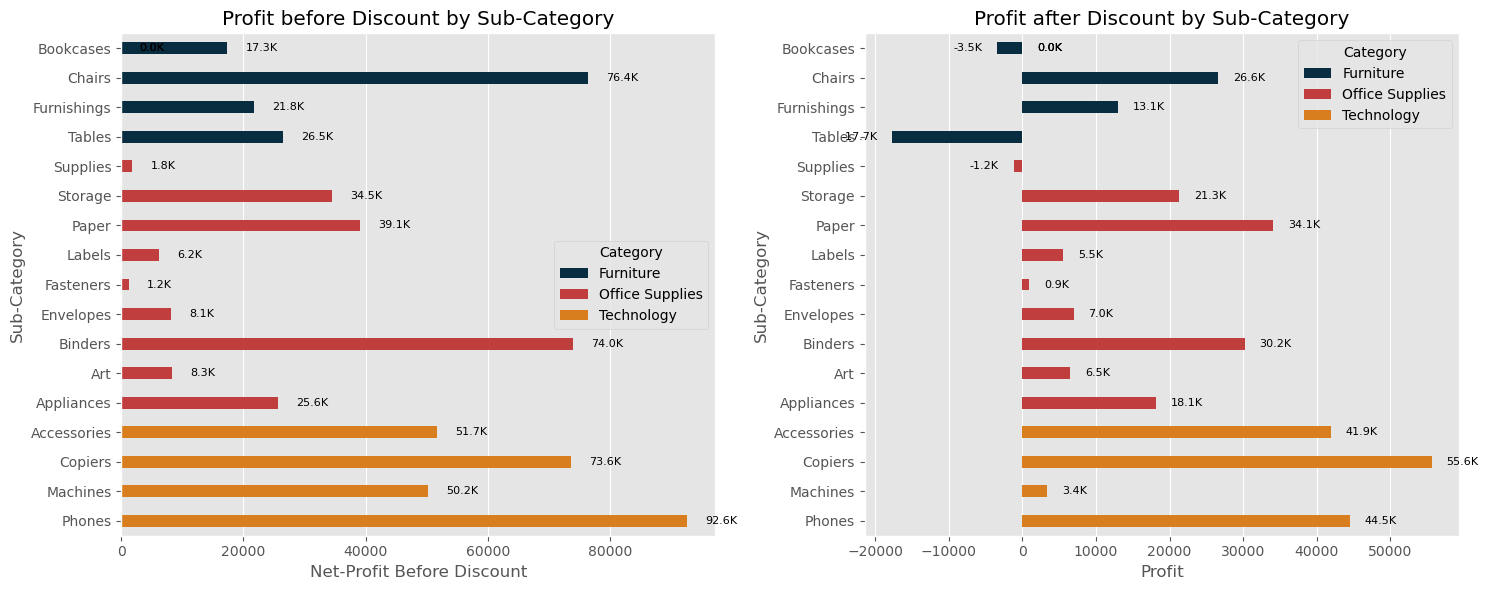

In [59]:
net_profit_before_discount = df.groupby(['Category', 'Sub-Category'])['Net-Profit Before Discount'].sum().reset_index().sort_values('Category')

net_profit_after_discount = df.groupby(['Category', 'Sub-Category'])['Profit'].sum().reset_index().sort_values('Category')

plt.figure(figsize=(15,6))
plt.subplot(121)

barplot1 = sns.barplot(data= net_profit_before_discount,
           x= 'Net-Profit Before Discount',
           y= 'Sub-Category',
           hue= 'Category',
           palette= ['#003049', '#d62828', '#f77f00'],
           width = 0.4)

for bar in barplot1.patches:
    width = bar.get_width()
    if width < 0:
        plt.text(width - 3000, bar.get_y() + bar.get_height()/2,
                 f'{width/1000:.1f}K', va='center', ha='right', fontsize=8, color='black')
    else:
        plt.text(width + 3000, bar.get_y() + bar.get_height()/2,
                 f'{width/1000:.1f}K', va='center', ha='left', fontsize=8, color='black')
        
plt.title('Profit before Discount by Sub-Category')

plt.subplot(122)

barplot2 = sns.barplot(data= net_profit_after_discount,
           x= 'Profit',
           y= 'Sub-Category',
           hue= 'Category',
           palette= ['#003049', '#d62828', '#f77f00'],
           width = 0.4)

for bar in barplot2.patches:
    width = bar.get_width()
    if width < 0:
        plt.text(width - 2000, bar.get_y() + bar.get_height()/2,
                 f'{width/1000:.1f}K', va='center', ha='right', fontsize=8, color='black')
    else:
        plt.text(width + 2000, bar.get_y() + bar.get_height()/2,
                 f'{width/1000:.1f}K', va='center', ha='left', fontsize=8, color='black')
plt.title('Profit after Discount by Sub-Category')

plt.tight_layout()

plt.show()

---

### 📊 **1. Furniture**

| Sub-Category | Before Discount | After Discount | Discount Impact |
| ------------ | --------------: | -------------: | --------------: |
| Bookcases    |           17.3K |      **-3.5K** |   🔻 **-20.8K** |
| Chairs       |           76.4K |          26.6K |       🔻 -49.8K |
| Furnishings  |           21.8K |          13.1K |        🔻 -8.7K |
| Tables       |           26.5K |     **-17.7K** |   🔻 **-44.2K** |

✅ **Insight**:

* **Bookcases and Tables** turned **unprofitable after discounting** — indicating excessive discounting or poor discount strategy.
* **Chairs**, though still profitable, saw a steep **\~65% profit drop**.

🔍 **Action**: Reassess pricing or discount policy in the **Furniture** category, especially for Bookcases and Tables.

---

### 📦 **2. Office Supplies**

| Sub-Category | Before Discount | After Discount | Discount Impact |
| ------------ | --------------: | -------------: | --------------: |
| Binders      |           73.9K |          30.2K |       🔻 -43.7K |
| Storage      |           34.5K |          21.3K |       🔻 -13.2K |
| Paper        |           39.1K |          34.1K |          🔻 -5K |
| Labels       |            6.2K |           5.5K |        🔻 -0.7K |
| Fasteners    |            1.2K |           0.9K |        🔻 -0.2K |
| Envelopes    |            8.1K |           7.0K |        🔻 -1.2K |
| Art          |            8.3K |           6.5K |        🔻 -1.8K |
| Appliances   |           25.6K |          18.1K |        🔻 -7.5K |
| Supplies     |            1.8K |      **-1.2K** |    🔻 **-3.0K** |

✅ **Insight**:

* Most office supply sub-categories remained **profitable**, though margins shrank significantly.
* **Binders** had a massive profit drop, and **Supplies became loss-making.**

🔍 **Action**:

* Optimize discounting on **Binders and Appliances** to retain profitability.
* Avoid discounting low-margin items like **Supplies**.

---

### 💻 **3. Technology**

| Sub-Category | Before Discount | After Discount | Discount Impact |
| ------------ | --------------: | -------------: | --------------: |
| Phones       |           92.6K |          44.5K |       🔻 -48.1K |
| Copiers      |           73.6K |          55.6K |       🔻 -18.0K |
| Accessories  |           51.7K |          41.9K |        🔻 -9.8K |
| Machines     |           50.2K |           3.4K |   🔻 **-46.8K** |

✅ **Insight**:

* **Phones and Machines** saw heavy losses post-discount, but still positive except Machines (very low margin left).
* **Copiers and Accessories** maintained strong profitability after discounting.

🔍 **Action**:

* Re-evaluate **discount strategy for Machines and Phones** to protect profitability.
* **Copiers** are a strong segment — possibly expand promotion here with care.

---

### 📈 **Overall Business Insights Summary**:

1. 🔻 **Discounting has a major impact** on profitability — some sub-categories even turned negative.
2. ❌ **Furniture (Bookcases, Tables)** and **Office Supplies (Supplies)** need urgent attention due to post-discount losses.
3. ✅ **Technology** still holds strong profit post-discount, especially **Copiers** and **Accessories**.
4. 💡 **Focus on sub-categories with high before/after profit ratio**, and cut losses on those that can’t survive heavy discounting.


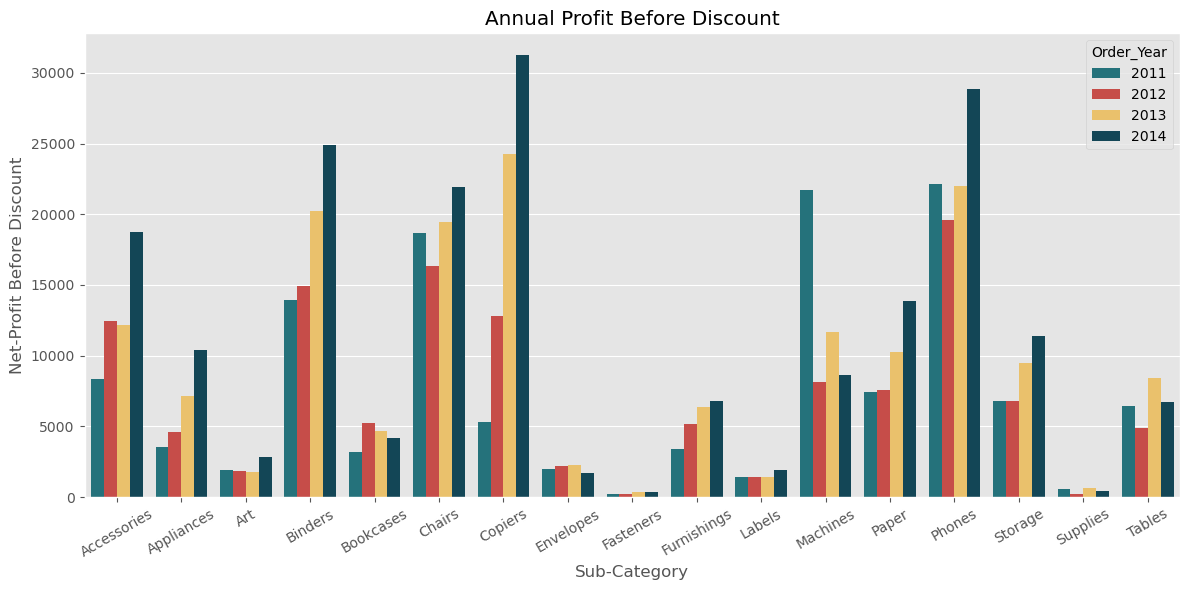

In [61]:
yearly_profit_before_discount = df.groupby(['Sub-Category', 'Order_Year'])['Net-Profit Before Discount'].sum().reset_index()


plt.figure(figsize=(12,6))

sns.barplot(data= yearly_profit_before_discount,
           x= 'Sub-Category',
           y= 'Net-Profit Before Discount',
           hue= 'Order_Year',
           palette= ['#177e89', '#db3a34', '#ffc857', '#084c61'])

plt.xticks(rotation= 30)
plt.title('Annual Profit Before Discount')

plt.tight_layout()
plt.show()

---

### 🔝 **1. Strong Growth Sub-Categories (Consistent Yearly Increase)**

These sub-categories show a **steady rise in profit each year**, indicating strong business growth:

* **Binders**: Clear, continuous growth from 2011 to 2014; nearly doubled by 2014.
* **Copiers**: Sharp upward trend, with 2014 being a standout year.
* **Phones**: Healthy, consistent growth—highest in 2014.
* **Accessories**: Profit almost doubled from 2011 to 2014.
* **Chairs**: Gradual and consistent rise.

✅ **Business Insight**: These are top-performing product lines. Continue investment and promotion in these sub-categories.

---

### 🪜 **2. Moderate but Positive Growth**

These sub-categories show **moderate growth**, though not always linear:

* **Storage**: Good upward momentum, especially between 2013–2014.
* **Appliances**: Moderately growth till 2013 and peaked in 2014 .
* **Furnishings**: Steady growth, though total profit is relatively lower.
* **Paper**: Grew steadily but less aggressively than top performers.

📌 **Action**: Consider marketing boosts or bundle strategies to accelerate these.

---

### 🔁 **3. Fluctuating Performance (Volatile)**

These sub-categories exhibit **up-down trends**:

* **Bookcases**: Peaked in 2012 and declined afterward.
* **Tables**: Irregular profit pattern; 2013 was a spike, but 2014 declined.
* **Machines**: Grew till 2013 but dropped in 2014.

⚠️ **Recommendation**: Investigate underlying issues (e.g., pricing, product demand) and optimize inventory or pricing.

---

### ⚠️ **4. Low & Flat Performance (Minimal Growth or Plateaued)**

* **Art, Envelopes, Fasteners, Labels, Supplies**: Remained flat or very low with minimal profit increase over the years.

🧾 **Suggestion**:

* Consider reducing stock or discounting these to free capital for high-performing sub-categories.
* Reassess their market relevance or explore bundling options to improve their traction.

---

### 🏆 **Top Profitable Sub-Categories in 2014**

(Profit before discount in 2014 – tallest bars)

1. **Copiers**
2. **Phones**
3. **Binders**
4. **Chairs**
5. **Accessories**

---

### 🔚 **Conclusion**

* 📈 **Best Growth Areas**: Copiers, Phones, Binders
* ⚖️ **Need Attention**: Bookcases, Tables, Appliances (due to volatility)
* 🔻 **Low Impact Products**: Art, Supplies, Fasteners – reevaluate for future product strategy.


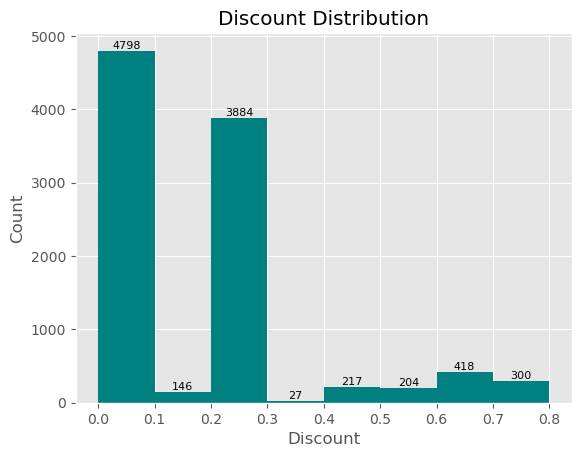

In [63]:
## Discount Distribution

counts, bins, patches = plt.hist(data=df, x='Discount',bins= 8, color='teal')

plt.title("Discount Distribution")
plt.xlabel("Discount")
plt.ylabel("Count")

for count, bin_edge in zip(counts, bins[:-1]):
    plt.text(bin_edge + (bins[1] - bins[0]) / 2, count, 
             str(int(count)), ha='center', va='bottom', fontsize=8)

plt.show()

In [64]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [65]:
print("Summary Statistics on orders that had no discount (0%) : \n")

df[df['Discount'] == 0][['Sales', 'Selling Price (Each Product)', 'Profit']].agg(['mean','median','sum','std','count'])

Summary Statistics on orders that had no discount (0%) : 



,Sales,Selling Price (Each Product),Profit
mean,226.7421,58.9050,66.9003
median,53.5500,15.9850,15.9952
sum,1087908.4700,282626.3900,320987.6032
std,650.3189,150.3307,257.0554
count,4798.0000,4798.0000,4798.0000


- This business relies heavily on a few high-value products.
- Most are low to medium in values.
- The average profit margin is healthy (~30%) , indicating decent profitability before discounts.
- Mean & Avg Selling Price: Indicates many low priced items sold, but again, some high price items are skewing the mean.

In [67]:
print("Summary Statistics on orders that had no discount (20%) : \n")

df[df['Discount'] == .20][['Sales', 'Selling Price (Each Product)','Net-Profit Before Discount', 'Profit']].agg(['mean',
                                                                                    'median',
                                                                                    lambda x: x.quantile(0.75),
                                                                                    'sum',
                                                                                    'std',
                                                                                    'count']).rename({'<lambda>' : '.75'})

Summary Statistics on orders that had no discount (20%) : 



,Sales,Selling Price (Each Product),Net-Profit Before Discount,Profit
mean,209.0769,57.7696,66.5180,24.7026
median,51.9840,15.9920,16.4295,6.4944
.75,201.5840,60.7840,54.1134,21.4200
sum,764594.3680,211263.6000,243256.1796,90337.3060
std,476.2236,122.5331,194.6845,117.8287
count,3657.0000,3657.0000,3657.0000,3657.0000


- Dicounting causes ~63% profit drop on average.
- Most transaction are low in value & profit, making them highly sensitive to discounting.
- Focus discounting only on high margin or excess stock items.
- Consider introducing tiered or personalized discounts rather than flat 20%.

In [69]:
print("Summary Statistics on orders that had no discount (40%) : \n")

df[df['Discount'] == .40][['Sales', 'Selling Price (Each Product)','Net-Profit Before Discount', 'Profit']].agg(['mean',
                                                                                    'median',
                                                                                    lambda x: x.quantile(0.75),
                                                                                    'sum',
                                                                                    'std',
                                                                                    'count']).rename({'<lambda>' : '.75'})

Summary Statistics on orders that had no discount (40%) : 



,Sales,Selling Price (Each Product),Net-Profit Before Discount,Profit
mean,565.1349,145.5547,114.1265,-111.9274
median,314.1270,107.9940,37.2549,-57.6242
.75,630.0075,184.9200,102.1566,-14.7713
sum,116417.7840,29984.2740,23510.0632,-23057.0504
std,958.9402,191.9070,363.3008,237.9968
count,206.0000,206.0000,206.0000,206.0000


- Avoid or restrict 40% discounts - they are too deep and not sustainable.
- Use them only for clearance sales or very high-margin products.
- Consider tiered discount (like 10%, 20%, 30%) or personalized offers instead or flat high discounts.
- Analyze which prodcuts/sub-categories tolerate 40% off without turning loss making - those can be exceptions.
- A standard deviation of ₹238 in Profit After Discount signals that some orders gain a lot, some lose heavily, making the outcome of          discounted orders unpredictable and financially risky. Businesses should evaluate where such discounts are truly effective

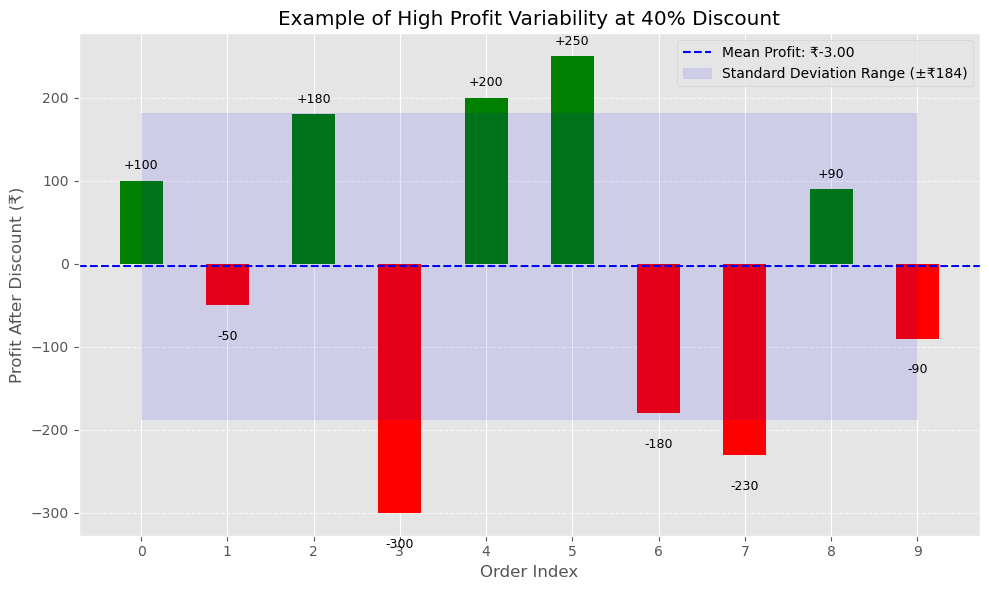

In [71]:
# Example profits after discount for 40% discounted orders
profits = [100, -50, 180, -300, 200, 250, -180, -230, 90, -90]

# Calculate mean and standard deviation
mean_profit = np.mean(profits)
std_profit = np.std(profits)

plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(profits)), profits, width= 0.5, color=['green' if p >= 0 else 'red' for p in profits])
plt.axhline(mean_profit, color='blue', linestyle='--', label=f'Mean Profit: ₹{mean_profit:.2f}')
plt.fill_between(range(len(profits)), mean_profit - std_profit, mean_profit + std_profit,
                 color='blue', alpha=0.1, label=f'Standard Deviation Range (±₹{std_profit:.0f})')

for i, p in enumerate(profits):
    plt.text(i, p + (10 if p >= 0 else -30), f'{p:+}', ha='center', va='bottom' if p >= 0 else 'top', fontsize=9)

plt.title('Example of High Profit Variability at 40% Discount')
plt.xlabel('Order Index')
plt.ylabel('Profit After Discount (₹)')
plt.xticks(range(len(profits)))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


The chart above demonstrates how **high standard deviation (184)** reflects **unpredictable profit outcomes** for orders with a 40% discount:

* Some orders yield **positive profits** (green bars).
* Others result in **heavy losses** (red bars).
* The **mean profit line (-0.3)** is almost neutral, but values vary wildly—some exceeding 250, others below -300.
* The **blue shaded area** shows the standard deviation range. Many bars fall outside this, indicating inconsistent results.

**Insight:** High discounting leads to **volatile profitability**. It's difficult to predict whether such discounts will be profitable, suggesting a need for careful strategy—like restricting them to clearance sales or high-margin items.


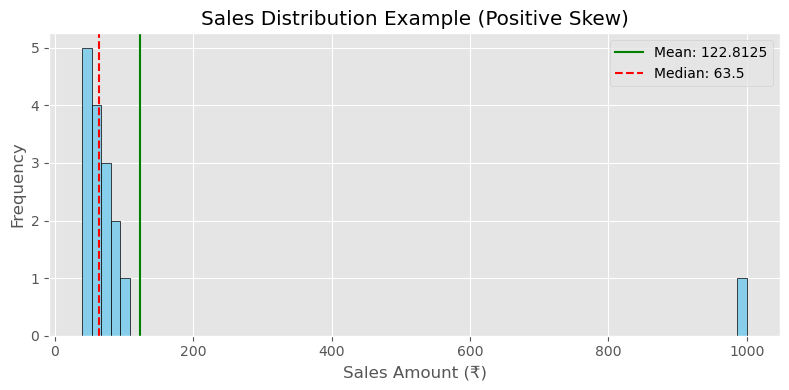

In [73]:
import matplotlib.pyplot as plt

# Sample sales data with positive skew
sales = [40, 42, 45, 50, 52, 55, 60, 62, 65, 70, 72, 75, 90, 92, 95, 1000]
mean_sales = np.mean(sales)
median_sales = np.median(sales)

plt.figure(figsize=(8, 4))
plt.hist(sales, bins=70, color='skyblue', edgecolor='black')
plt.axvline(x= mean_sales, color='green', linestyle='-', label=f'Mean: {mean_sales}')
plt.axvline(x= median_sales,color='red', linestyle='--', label=f'Median: {median_sales}')

plt.title('Sales Distribution Example (Positive Skew)')
plt.xlabel('Sales Amount (₹)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

When analyzing performance, don't rely only on averages — look at the distribution. Most customers buy smaller quantities, so pricing, discounts, and inventory decisions should reflect typical orders (median), not the inflated mean caused by outliers.

In [75]:
print("Summary Statistics on orders that had no discount (50%) : \n")

df[df['Discount'] == .50][['Sales', 'Selling Price (Each Product)','Net-Profit Before Discount', 'Profit']].agg(['mean',
                                                                                    'median',
                                                                                    lambda x: x.quantile(0.75),
                                                                                    'sum',
                                                                                    'std',
                                                                                    'count']).rename({'<lambda>' : '.75'})

Summary Statistics on orders that had no discount (50%) : 



,Sales,Selling Price (Each Product),Net-Profit Before Discount,Profit
mean,892.7052,215.7240,135.6491,-310.7035
median,301.9600,90.8825,-20.0020,-185.2767
.75,613.6425,156.6125,1.5971,-73.4374
sum,58918.5400,14237.7850,8952.8419,-20506.4281
std,2917.8443,520.6492,1176.5353,547.4555
count,66.0000,66.0000,66.0000,66.0000


- The mean profit after 50% discount is -310, indicating significant losses per order.
- Median profit before discount was already negative (-20)
- High mean v/s median sales & high std. dev (2917) indicated skewed data.
- 75% of orders still lost money after discount- even some with earlier profits.

In [77]:
print("Summary Statistics on orders that had no discount (60%) : \n")

df[df['Discount'] == .60][['Sales', 'Selling Price (Each Product)','Net-Profit Before Discount', 'Profit']].agg(['mean',
                                                                                    'median',
                                                                                    lambda x: x.quantile(0.75),
                                                                                    'sum',
                                                                                    'std',
                                                                                    'count']).rename({'<lambda>' : '.75'})

Summary Statistics on orders that had no discount (60%) : 



,Sales,Selling Price (Each Product),Net-Profit Before Discount,Profit
mean,48.1500,12.7243,-14.1872,-43.0772
median,22.4940,7.5760,-0.2737,-12.0617
.75,56.5080,16.4850,1.7850,-6.2160
sum,6644.7000,1755.9520,-1957.8352,-5944.6552
std,71.4032,15.0380,39.6761,79.8828
count,138.0000,138.0000,138.0000,138.0000


- Consistent and deep losses in profit(-43) and Sales.
- Profit was negative before discount began.
- Large std. dev = unpredictable and risky pricing.

In [79]:
print("Summary Statistics on orders that had no discount (70%) : \n")

df[df['Discount'] == .70][['Sales', 'Selling Price (Each Product)','Net-Profit Before Discount', 'Profit']].agg(['mean',
                                                                                    'median',
                                                                                    lambda x: x.quantile(0.75),
                                                                                    'sum',
                                                                                    'std',
                                                                                    'count']).rename({'<lambda>' : '.75'})

Summary Statistics on orders that had no discount (70%) : 



,Sales,Selling Price (Each Product),Net-Profit Before Discount,Profit
mean,97.1777,23.8010,-27.8497,-95.8741
median,12.2940,3.5190,-0.3958,-9.2023
.75,38.1645,9.9840,-0.0000,-3.8213
sum,40620.2820,9948.8280,-11641.1595,-40075.3569
std,341.5218,79.8862,203.5403,419.9667
count,418.0000,418.0000,418.0000,418.0000


- A few large value orders skewing the average - most orders are small.
- Items sold at very low prices due to steep discount.
- Even before discount, most products were not profitable.
- Most orders heavily losses after discount.

In [81]:
print("Summary Statistics on orders that had no discount (80%) : \n")

df[df['Discount'] == .80][['Sales', 'Selling Price (Each Product)','Net-Profit Before Discount', 'Profit']].agg(['mean',
                                                                                    'median',
                                                                                    lambda x: x.quantile(0.75),
                                                                                    'sum',
                                                                                    'std',
                                                                                    'count']).rename({'<lambda>' : '.75'})

Summary Statistics on orders that had no discount (80%) : 



,Sales,Selling Price (Each Product),Net-Profit Before Discount,Profit
mean,56.5459,12.8677,-56.5601,-101.7968
median,8.7010,2.3000,-7.7625,-14.0498
.75,23.9320,6.5360,-2.9485,-5.6022
sum,16963.7560,3860.3160,-16968.0344,-30539.0392
std,216.7684,40.9608,185.8065,356.7659
count,300.0000,300.0000,300.0000,300.0000


- A few high-value orders inflate the mean, while most are small.
- Products sold at extremely low prices.
- Losses already exist before discount.
- Average loss of -101 per order.

In [149]:
print("Summary Statistics of net profit after discount on orders that had different discount : \n")

df.groupby('Discount')['Profit'].agg(['mean',
                                      'median',
                                      lambda x: x.quantile(0.75),
                                      'sum',
                                      'std',
                                      'count']).rename(columns={'<lambda_0>' : '.75'})

Summary Statistics of net profit after discount on orders that had different discount : 



,mean,median,.75,sum,std,count
Discount,,,,,,
0.0000,66.9003,15.9952,50.3658,320987.6032,257.0554,4798
0.1000,96.0551,54.3240,133.5659,9029.1770,130.0710,94
0.1500,27.2883,14.0980,29.5813,1418.9915,60.7464,52
0.2000,24.7026,6.4944,21.4200,90337.3060,117.8287,3657
0.3000,-45.6796,-25.3764,-9.1223,-10369.2774,68.0700,227
0.3200,-88.5607,-46.9764,-18.9666,-2391.1377,103.4392,27
0.4000,-111.9274,-57.6242,-14.7713,-23057.0504,237.9968,206
0.4500,-226.6465,-167.3184,-112.5589,-2493.1111,137.5437,11
0.5000,-310.7035,-185.2767,-73.4374,-20506.4281,547.4555,66


---

### 🔍 **1. Clear Profit Threshold Is at 20% Discount**

| **Discount ≤ 20%** | **Avg Profit (Mean)** | **Summary**                                                                                |
| ------------------ | --------------------- | ------------------------------------------------------------------------------------------ |
| 0%                 | ₹66.90                | Most profitable — no discount yields strong gains                                          |
| 10%                | ₹96.06                | Surprisingly highest mean profit, likely due to selective discounting on high-margin items |
| 15%                | ₹27.29                | Still profitable, but significantly lower margin                                           |
| 20%                | ₹24.70                | Last tier with **positive** average profit                                                 |

✅ **Conclusion**: Discounts **up to 20%** are sustainable and profitable on average.

---

### ⚠️ **2. Discounts Above 20% Consistently Cause Losses**

| **Discount > 20%** | **Avg Profit (Mean)** | **Summary**                     |
| ------------------ | --------------------- | ------------------------------- |
| 30%                | ₹-45.68               | Enters loss zone                |
| 40%                | ₹-111.93              | Steep loss increase             |
| 50%                | ₹-310.70              | Massive average losses          |
| 80%                | ₹-101.80              | Even deeper loss, unsustainable |

❌ **Conclusion**: Discounts above **20% consistently lead to financial loss**, worsened further as discount increases.

---

### 📈 **3. Profit Volatility Increases with Higher Discounts**

* **Standard Deviation (std)** increases dramatically with higher discounts:

  * 0% Discount → ₹257.05
  * 50% Discount → ₹547.46
  * 70% Discount → ₹419.97
  * 80% Discount → ₹356.77

💡 **Interpretation**:

* The higher the discount, the **more unpredictable the profits**.
* This indicates **instability in profit outcomes**, making planning and forecasting difficult.

---

### 📉 **4. Even the Best 25% (75th Percentile) Often Incurs Losses at Higher Discounts**

| **Discount** | **75th Percentile Profit** | **Observation**                            |
| ------------ | -------------------------- | ------------------------------------------ |
| 20%          | ₹21.42                     | Profitable segment still exists            |
| 30%          | ₹-9.12                     | Top 25% of orders are now in loss          |
| 50%          | ₹-73.44                    | Severe loss even in best-performing orders |
| 80%          | ₹-5.60                     | All quartiles are losing money             |

📊 **Conclusion**: After 20%, **even the best-performing orders lose money**, which means discounting is not helping even high-volume sales.

---

### 🧠 **Key Business Insights**

#### ✅ Sustainable Discounts (0–20%):

* Most profitable and stable.
* Should be the primary range used in promotional strategies.
* Use for general sales or customer incentives.

#### ⚠️ Risky Discounts (30–40%):

* Losses start to appear.
* Use selectively, such as during **special events** or **loyalty programs**.

#### 🚫 High-Risk Discounts (50%+):

* Cause severe and **consistent losses**.
* Should be avoided \*\*unless for:

  * Inventory clearance\*\*
  * Product discontinuation
  * Time-limited loss-leader campaigns

---

### 🧾 Final Recommendation:

* **Adopt tiered discounts**:

  * ≤20% for regular promotions
  * 30–40% for **targeted, time-limited events**
  * > 50% only for **clearance sales or non-performing inventory**

# Final Insights:
---

### ✅ **Most Profitable Products:**

* **Labels, Paper, Envelopes, Copiers, Fasteners**
  → High profit margins (30–43%), consistent performers.
  → Focus areas for stock, marketing, and bundling.

### ❌ **Least Profitable (Loss-Making) Products:**

* **Binders, Appliances, Tables, Machines, Bookcases**
  → Negative margins due to high costs or excessive discounting.
  → Need pricing, inventory, and supplier review.

---

### 📊 **Factors Affecting Profitability:**

1. **Heavy Discounting:**

   * 20% discounts reduced profit by \~63%.
   * 40% & 50% discounts led to **net losses**.
2. **Category Performance:**

   * **Office Supplies**: Most profitable overall.
   * **Technology**: Mixed (Copiers good, Machines bad).
   * **Furniture**: Weak margins, often loss-making.
3. **High Variability & Skewed Sales:**

   * A few large orders drive most profit.
   * Majority of sales are low value, yielding little or no margin.

---

### 📈 **Profitability Trend (2011–2014):**

* Profit and sales grew steadily, **peaking in 2014**.
* **2013 had the best profit margin (13.4%)**, showing efficiency.
* Business is overall profitable but discount strategies hurt bottom line.

---


### What portion of all orders was shipped through each mode?

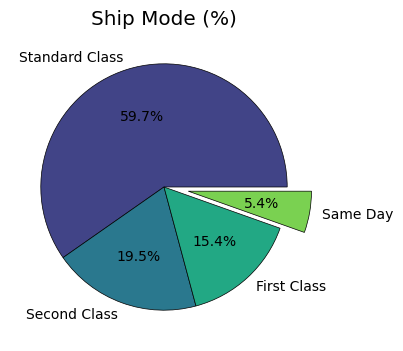

In [183]:
df_ship = (df['Ship Mode'].value_counts() / len(df)) * 100

colors = sns.color_palette('viridis', n_colors= len(df_ship))

explode = [0.2 if label == 'Same Day' else 0 for label in df_ship.index]

plt.figure(figsize=(6,4))
plt.pie(df_ship,
        labels= df_ship.index,
        autopct= '%.1f%%',
        textprops= {'fontsize': 10},
        colors= colors,
        wedgeprops= {'edgecolor': 'black'},
       explode= explode)


plt.title('Ship Mode (%)')

plt.show()

---

### 📊 **Ship Mode Distribution Insights:**

1. **Standard Class dominates shipping:**

   * 📦 **59.7%** of all shipments are via **Standard Class**.
   * This indicates it's the **default or most economical choice** for the majority of customers.

2. **Second Class and First Class are secondary options:**

   * **Second Class**: 19.5%
   * **First Class**: 15.4%
   * Together, these modes account for **\~35%** of shipments, likely offering a balance between speed and cost.

3. **Same Day shipping is rare:**

   * 🚀 Only **5.4%** of shipments use **Same Day** service.
   * This could indicate **high costs, limited availability**, or **lower customer demand** for urgent delivery.

---

### 🧠 Business Implications:

* **Optimize Standard Class operations** – Since it handles the majority, efficiency here is critical.
* **Promote premium shipping** (First Class, Same Day) with incentives or offers if margins are higher.
* **Explore why Same Day is underused** – is it pricing, logistics, or lack of visibility?

In [197]:
print("Following are the average order fulfillment time for corresponding ship modes: \n")

print("Standard Class: ", df[df['Ship Mode'] == 'Standard Class']['Order Fulfillment Time'].mean(),"\n")

print("Second Class: ", df[df['Ship Mode'] == 'Second Class']['Order Fulfillment Time'].mean(),"\n")

print("First Class: ", df[df['Ship Mode'] == 'First Class']['Order Fulfillment Time'].mean(),"\n")

Following are the average order fulfillment time for corresponding ship modes: 

Standard Class:  5 days 00:10:22.520107238 

Second Class:  3 days 05:45:44.884318766 

First Class:  2 days 04:22:09.518855656 



#### Insights:

 - **Efficiency Opportunity :** Explore improving Standard Class delievery speed, as it's the most used.
 - **Promote Faster Options :** Encourage more use of First class or Same Day with incentivies for urgent delieveries.
 - **Customer Segmentation :** Grouping customers based on the type of shipping (Delivery Speed) they prefer, so the business can target                                    each group with customized offers or promotions.

<h2 style="text-align:center;"><b>Thank You</b></h2>